In [34]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
import matplotlib.pyplot as plt
import cv2

In [6]:
img = plt.imread('Desktop/Cat03.jpg')

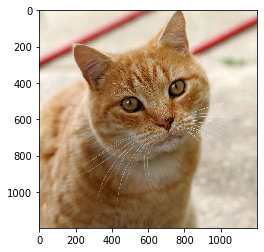

In [7]:
plt.imshow(img)

In [35]:
import os
import numpy as np

In [56]:
labels = ['cats','dogs']
img_size = 150

def get_data(data_dir):
    data=[]
    for label in labels:
        path = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                new_img = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(new_img,(img_size,img_size))
                data.append([resized_img,class_num])
            except:
                continue
    return np.array(data)
        
    

In [57]:
train = get_data('Downloads/Compressed/CatsVDogs/data/train')
val = get_data('Downloads/Compressed/CatsVDogs/data/validation')

C:\Users\Home\anaconda3\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [58]:
X_train = []
y_train = []

X_val = []
y_val = []

for img,label in train:
    X_train.append(img)
    y_train.append(label)

for img,label in val:
    X_val.append(img)
    y_val.append(label)
    
X_train[:5]

[array([[167, 172, 173, ..., 209, 206, 204],
        [167, 172, 173, ..., 209, 207, 204],
        [167, 172, 173, ..., 210, 208, 206],
        ...,
        [126, 127, 128, ...,   3,   3,   2],
        [125, 126, 129, ...,   2,   2,   2],
        [123, 124, 127, ...,   2,   2,   2]], dtype=uint8),
 array([[ 42,  43,  44, ..., 176, 201, 194],
        [ 42,  42,  42, ..., 172, 193, 193],
        [ 40,  37,  36, ..., 167, 186, 196],
        ...,
        [ 23,  20,  18, ...,  42,  52,  32],
        [ 29,  23,  20, ...,  34,  29,  39],
        [ 29,  22,  19, ...,  38,  40,  36]], dtype=uint8),
 array([[ 33,  16,  23, ..., 152, 151, 147],
        [ 43,  44,  46, ..., 153, 153, 149],
        [ 46,  56,  55, ..., 156, 155, 151],
        ...,
        [172, 164, 157, ..., 173, 168, 153],
        [163, 154, 148, ..., 172, 165, 148],
        [145, 133, 133, ..., 171, 164, 150]], dtype=uint8),
 array([[222, 223, 223, ..., 242, 237, 246],
        [219, 221, 224, ..., 243, 236, 240],
        [225, 22

In [59]:
X_train = np.array(X_train)/255
X_val = np.array(X_val)/255

X_train = X_train.reshape(-1,img_size,img_size,1)
X_val = X_val.reshape(-1,img_size,img_size,1)

y_train = np.array(y_train)
y_val = np.array(y_val)

len(X_train)


2000

In [65]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [60]:
#CNN Model
model = Sequential([
    Conv2D(64,(3,3),input_shape=(img_size,img_size,1),activation="relu"),
    MaxPooling2D((2,2),strides = 2),
          
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2),strides = 2),
          
    Conv2D(256,(3,3),activation="relu"),
    MaxPooling2D((2,2),strides = 2),

    Flatten(),
    Dense(256,activation="relu"),
    Dense(1,activation="sigmoid")
])



model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 73984)            

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [62]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
63/63 [==============================] - 227s 3s/step - loss: 0.7354 - accuracy: 0.4924
Epoch 2/10
63/63 [==============================] - 196s 3s/step - loss: 0.6900 - accuracy: 0.5384
Epoch 3/10
63/63 [==============================] - 214s 3s/step - loss: 0.6690 - accuracy: 0.5916
Epoch 4/10
63/63 [==============================] - 194s 3s/step - loss: 0.6184 - accuracy: 0.6545
Epoch 5/10
63/63 [==============================] - 197s 3s/step - loss: 0.5703 - accuracy: 0.7000
Epoch 6/10
63/63 [==============================] - 205s 3s/step - loss: 0.4798 - accuracy: 0.7746
Epoch 7/10
63/63 [==============================] - 188s 3s/step - loss: 0.3613 - accuracy: 0.8297
Epoch 8/10
63/63 [==============================] - 191s 3s/step - loss: 0.2479 - accuracy: 0.9027
Epoch 9/10
63/63 [==============================] - 202s 3s/step - loss: 0.1217 - accuracy: 0.9582
Epoch 10/10
63/63 [==============================] - 226s 4s/step - loss: 0.0747 - accuracy: 0.9744


In [64]:
model.evaluate(X_val,y_val)

26/26 [==============================] - 26s 796ms/step - loss: 1.2618 - accuracy: 0.6683


[1.2617958784103394, 0.6683291792869568]

In [67]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 5 , validation_data = datagen.flow(X_val, y_val))

Epoch 1/5
63/63 [==============================] - 245s 4s/step - loss: 0.7244 - accuracy: 0.6025 - val_loss: 0.6084 - val_accuracy: 0.6683
Epoch 2/5
63/63 [==============================] - 210s 3s/step - loss: 0.5997 - accuracy: 0.6910 - val_loss: 0.5924 - val_accuracy: 0.6833
Epoch 3/5
63/63 [==============================] - 196s 3s/step - loss: 0.5803 - accuracy: 0.6985 - val_loss: 0.5964 - val_accuracy: 0.6671
Epoch 4/5
63/63 [==============================] - 195s 3s/step - loss: 0.5725 - accuracy: 0.7000 - val_loss: 0.5633 - val_accuracy: 0.7095
Epoch 5/5
63/63 [==============================] - 196s 3s/step - loss: 0.5585 - accuracy: 0.7070 - val_loss: 0.5741 - val_accuracy: 0.6895


In [68]:
model.evaluate(X_val,y_val)

26/26 [==============================] - 20s 754ms/step - loss: 0.5243 - accuracy: 0.7382


[0.5243002772331238, 0.7381545901298523]